Team Project - Part B - Advanced Model

In [1]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics

Load the previously cleaned data: 

In [2]:
cbb = pd.read_csv('cbb_numerical.csv')
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,WIN_PCT
0,0,0,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0,2016,0.825000
1,1,1,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0,2015,0.900000
2,2,1,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,3.0,2018,0.825000
3,3,2,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,3.0,2019,0.815789
4,4,3,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0,2017,0.948718


Separate x and y variables, then train, test, split data.

In [3]:
y = cbb['WIN_PCT']
x = cbb.drop(columns = ['WIN_PCT'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)
print(f"X_train shape: {x_train.shape}; Y_train shape: {y_train.shape}")

X_train shape: (3399, 23); Y_train shape: (3399,)


Now, onto fitting the model: Gradient Boosting Regressor (GBR). According to scikit learn documentation, GBR is an "estimator that builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage, a regression tree is fit on the negative gradient of the given loss function."

In [4]:
#Arbitrary hyperparameters for initial model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=16)
gbr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=16)

Using metrics from Part A to evaluate the initial model performance and compare to outputs in Part A. 

Mean Absolute Error: 0.005230783768341103
Mean Squared Error: 9.20451007274127e-05
Root Mean Squared Error: 0.009594013796498976
R^2 Score: 0.9971958103808166


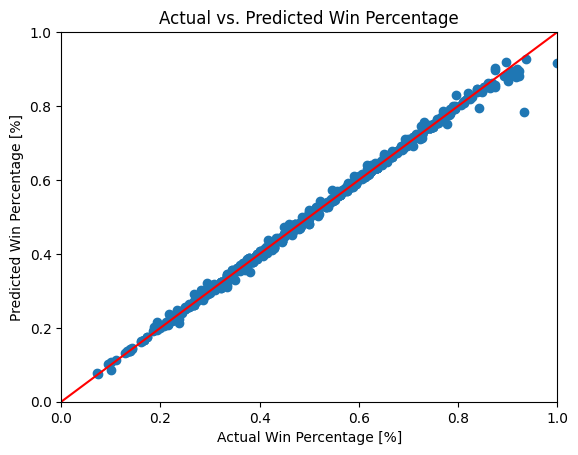

In [5]:
y_pred = gbr.predict(x_test)

print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R^2 Score: {metrics.r2_score(y_test, y_pred)}')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Win Percentage [%]")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.ylabel("Predicted Win Percentage [%]")
plt.title("Actual vs. Predicted Win Percentage")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

Even before hyperparameter tuning, this model seems to produce excellent results with an R^2 value close to 1 at 0.997. But let's see if we can make it better with hyperparameter tuning.

In [6]:
#Here, I am choosing only some of the available hyperameters
params = {'loss': ['squared_error', 'absolute_error'],
          'n_estimators': [100, 200, 300, 400, 500],
          'learning_rate': [0.01, 0.05, 0.1, 0.2],
          'max_depth': [1,2, 3, 4, 5],}

gbr_grid = RandomizedSearchCV(estimator = gbr,
                              param_distributions=params)

gbr_grid.fit(x_train, y_train)
print(f'Best Hyperparameters: {gbr_grid.best_params_}')

Best Hyperparameters: {'n_estimators': 500, 'max_depth': 5, 'loss': 'squared_error', 'learning_rate': 0.1}


Using the best hyperparameters, let's see if the model prediction improves.

Tuned Mean Absolute Error: 0.002284509517214484
Tuned Mean Squared Error: 6.235318916161967e-05
Tuned Root Mean Squared Error: 0.007896403558685414
Tuned R^2 Score: 0.9981003859587508


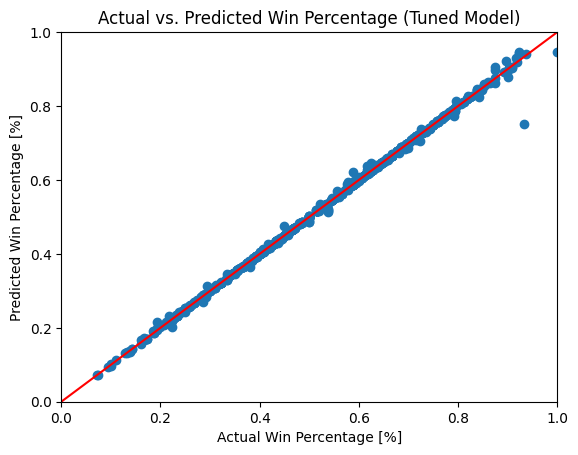

In [7]:
best_params = {'n_estimators': 500,
               'learning_rate': 0.1,
               'max_depth': 5,
               'loss': 'squared_error'}
gbr_tuned = GradientBoostingRegressor(**best_params)
gbr_tuned.fit(x_train, y_train)

y_pred_tuned = gbr_tuned.predict(x_test)

print(f'Tuned Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred_tuned)}')
print(f'Tuned Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred_tuned)}')
print(f'Tuned Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_tuned))}')
print(f'Tuned R^2 Score: {metrics.r2_score(y_test, y_pred_tuned)}')

plt.scatter(y_test, y_pred_tuned)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Actual Win Percentage [%]")
plt.ylabel("Predicted Win Percentage [%]")
plt.plot([0, 1], [0, 1], color='red')
plt.title("Actual vs. Predicted Win Percentage (Tuned Model)")
plt.show()

There is some improvement! The model works very well for this dataset.

In [8]:
#most important features from the tuned model
importances = gbr_tuned.feature_importances_
feature_names = x.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.reindex(feature_importance.Importance.abs().sort_values(ascending=False).index)
print(feature_importance)

    Feature  Importance
3         W    0.914188
2         G    0.082203
20      WAB    0.002646
13      FTR    0.000235
18     3P_D    0.000123
7     EFG_O    0.000110
6   BARTHAG    0.000087
5     ADJDE    0.000063
12      DRB    0.000047
15     2P_O    0.000044
1      CONF    0.000043
8     EFG_D    0.000036
4     ADJOE    0.000032
10     TORD    0.000031
14     FTRD    0.000029
9       TOR    0.000028
17     3P_O    0.000020
19    ADJ_T    0.000011
11      ORB    0.000011
16     2P_D    0.000009
0      TEAM    0.000004
22     YEAR    0.000002
21     SEED    0.000001
